# Group Project Proposal: Group 24

### Background Info:  
Work ethic is one of the driving factors in both workplace and academy productivity. Students with strong work ethic are more likely to gain academic improvement .What's more,such students are more likely to be desired by employers after graduation since it is essential to assess whether you can fulfill your responsibility.Accoring to research,work ethic for students is linked to improved performance and a greater likelihood for career advancement in the future.
We will be looking into a dataset that shows students’ knowledge status alongside a couple of attributes that relate to the students work ethic. Our goal is to try to classify a student’s knowledge status when given only 2 attributes in the dataset. Our classifier will find the nearest neighbours close  to our unclassified in the data, find the majority of the user knowledge class among it, and use that to classify our user’s knowledge.  

#### Dataset: 
The dataset we will be using is the User Knowledge Modeling Data Set. This dataset shows the knowledge status of ~400 students on the subject of Electrical DC Machines, including the degree to how they study. Each observation represents a single user, showing the values of their attributes.

#### Question (Classification): 
Can we predict the UNS level (The knowledge level of the user) if we are given the STG (degree of study time for goal object materials)and SCG (Degree of repetition number for goal object materials)?


##### Relevant columns  in the dataset:
* STG (The degree of study time for goal object materials)
* SCG (The degree of repetition number of user for goal object materials)
* STR (The degree of study time of user for related objects with goal object)
* LPR (The exam performance of user for related objects with goal object)
* PEG (The exam performance of user for goal objects)
* UNS (The knowledge level of user)



### Preliminary Exploratory Data Analysis:

In [7]:
library(tidyverse)
library(tidymodels)
library(readxl)
library(cowplot)
options(repr.matrix.rows=6)


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dials’ was built under R version 4.0.2”
Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘modeldata’ was built under R version 4.0.1”
Warning message:
“package ‘parsnip’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built under R version 4.0.1”
Warning message:
“package ‘tune’ was built under R version 4.0.2”
Warning message:
“package ‘workflows’ was built under R version 4.0.2”
Warning message:
“package ‘yardstick’ was built under R version 4.0.2”
── Conflicts ────

#### Reading the Data
In this section, we downloaded the data from the internet in a reproducible way. Then, we read it into our Jupyter notebook. The excel file was split into three shees: an introduction sheet, training data sheet, and testing data sheet.

In [4]:
user_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(user_url, "Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls")
training_data <- read_excel("Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls", sheet = 2)
testing_data <- read_excel("Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls", sheet = 3)
head(training_data, 10)
head(testing_data, 10)

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)
0.10,0.10,0.43,0.29,0.56,Middle,NA,NA,NA
0.15,0.02,0.34,0.40,0.01,very_low,NA,NA,NA
0.20,0.14,0.35,0.72,0.25,Low,NA,NA,NA


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.20,0.20,0.68,0.67,0.85,High,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.22,0.22,0.90,0.30,0.90,High,NA,NA,PEG (The exam performance of user for goal objects)
0.14,0.14,0.70,0.50,0.30,Low,NA,NA,UNS (The knowledge level of user)
0.16,0.16,0.80,0.50,0.50,Middle,NA,NA,NA
0.12,0.12,0.75,0.68,0.15,Low,NA,NA,NA
0.20,0.20,0.88,0.77,0.80,High,NA,NA,NA


#### Tidying the Data
Now, we tidy the data into six columns with one observation per row. 

In [8]:
training_tidy <- training_data %>%
                    select(STG, SCG, STR, LPR, PEG, UNS) 
testing_tidy <- testing_data %>%
                    select(STG, SCG, STR, LPR, PEG, UNS)
training_summary <- training_tidy %>%
                        summarise(avg_STG = mean(STG), 
                                  avg_SCG = mean(SCG), 
                                  avg_STR = mean(STR), 
                                  avg_LPR = mean(LPR), 
                                  avg_PEG = mean(PEG))
head(training_tidy)
head(testing_tidy)
training_summary

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


avg_STG,avg_SCG,avg_STR,avg_LPR,avg_PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


#### Visualizing the Data
Here, we do a preliminary visualization of the data.

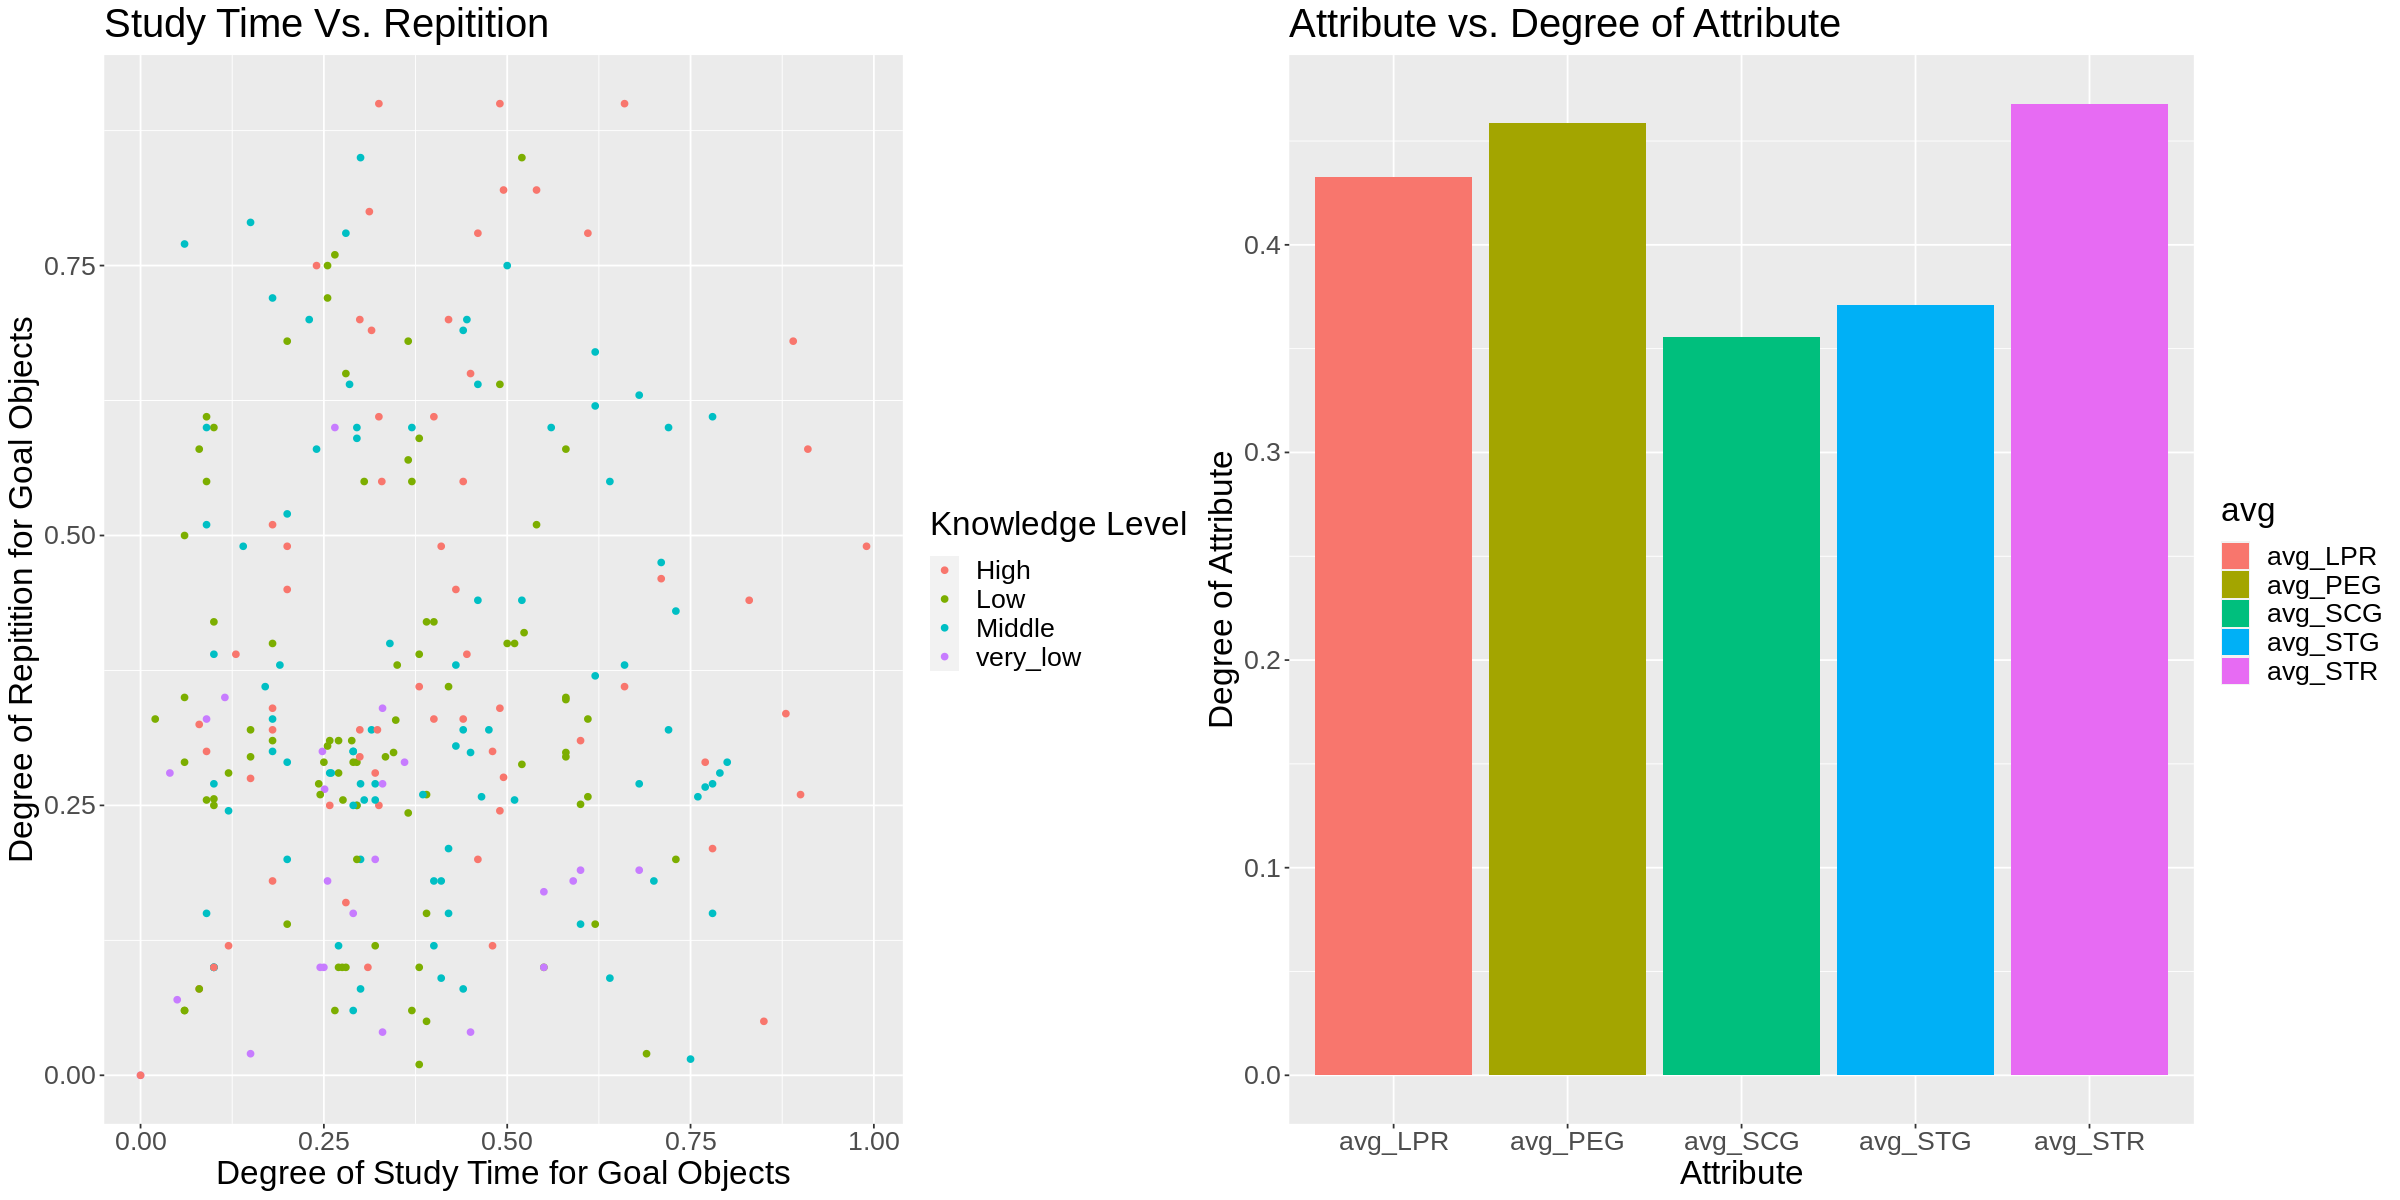

In [10]:
options(repr.plot.width=20)
options(repr.plot.height=10)
spread_plot <- training_tidy %>%
                    ggplot(aes(x = STG, y = SCG, colour = UNS)) +
                        geom_point() +
                        labs(title = "Study Time Vs. Repitition", x = "Degree of Study Time for Goal Objects", y = "Degree of Repitition for Goal Objects", colour = "Knowledge Level") +
                        theme(text = element_text(size = 20))
training_long <- training_summary %>%
                    pivot_longer(cols = 5:1, names_to = "avg", values_to = "value")
                    
averages_plot <- training_long %>%
                    ggplot(aes(avg, value, fill = avg)) +
                    geom_col() +
                    labs(x = "Attribute", y = "Degree of Attribute", title = "Attribute vs. Degree of Attribute") +
                    theme(text = element_text(size=20))
plot_grid(spread_plot, averages_plot)


The plot on the left, shows minimal correlation between Knowledge Level and SCG vs. STG. On the right, we can see the average level of each attribute in the data set.

### Methods:
We will use classification to predict UNS based on two variables: STG and SCG

First, we need to read in the data, change the data type or make it tidy if needed. Second, 3 columns needed should be selected. Third, before training, we will split the data into two parts: training data(75%) and testing data. Fourthly, standardize the data in SCG and STG. Fifthly, build a recipe and knn model. After, 5-fold cross-validation will be performed, which includes: creating a new knn model specification and a workflow combining the previous recipe and new model. Second, metrics should be collected and plotted as Accuracy vs K to find the best K. Training data will be trained with the best K. Finally, accuracy should be tested with the testing data.


Visualization: generate scatter plot of STG vs SCG where different color of points indicate UNS and background color indicates the decision of classifier.



#### Discussion:

We expected to find that the STG (degree of study time for goal object materials) and the SCG (degree of repetition number of user for goal object materials) will be able to accurately predict the knowledge level of the user. The higher the STG and SCG, the higher the level of knowledge should be. Such findings would prove that study time and repetition for goal objects will result in a higher understanding of the information learned. Future questions along these lines could be: What is the most effective way to study? Does studying time or the amount of repetitions affect understanding? And, how can you maximize the efficiency of your studying?

"The Pearson correlation between the time spent studying and the grade was found to be significant for all the Stage quizzes. This suggests that there is a consistency over time between the amount of time spent studying and grade a student earns on the vocabulary quiz. Of interest to the students and their parents - the overall grade mean of 80 was earned when students spent an average of 45 minutes preparing for the quiz." (Stehle, 2010)

"The Pearson correlation between the time spent studying and the retention of the vocabulary on a subsequent quiz was also significant for all but one of the Stages. Despite this one inaccuracy the consistency of significance in the rest of the Stage vocabulary quizzes suggests that the amount of time spent studying can have long term consequences for retention and thus successful second language acquisition." (Stehle, 2010)






#### References
Stehle, A. (2010). THE ROLE OF STUDY TIME AND METHOD ON VOCABULARY LEARNING AND RETENTION: AN ACTION RESEARCH STUDY. The Classical Outlook, 88(1), 18–21. http://www.jstor.org/stable/43940041

"Repetition and Learning ." Learning and Memory. . Retrieved November 24, 2021 from Encyclopedia.com: https://www.encyclopedia.com/psychology/encyclopedias-almanacs-transcripts-and-maps/repetition-and-learning

https://www.careerbuilder.com/share/aboutus/pressreleasesdetail.aspx
https://www.allaboutphilosophy.org/what-are-work-ethics-faq.htm
https://smallbusiness.chron.com/negative-work-ethic-definition-10235.html
https://bizfluent.com/list-6691598-types-workplace-ethics.html
